<a href="https://colab.research.google.com/github/Douglasepol/H-M-Fashion-Parquet-Performance/blob/main/H%26M_Fashion_Parquet_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# H&M Fashion Parquet Performance

Os varejistas de moda estão cada vez mais recorrendo à inteligência artificial (IA) para obter ajuda na busca de oferecer aos clientes o que eles desejam. O varejo orientado por IA permite que as marcas atendam às demandas modernas dos clientes, personalizando a experiência de compra.

À medida que mais empresas de varejo levam seus negócios das lojas tradicionais de varejo para o comércio eletrônico, elas podem obter mais informações sobre as preferências de seus clientes para atender à demanda.

O Grupo H&M é uma empresa multinacional sueca de moda presente em 74 países, com mais de 5000 lojas e tem investido fortemente em inteligência artificial para acompanhar os ciclos da moda.

Este notebook tem como objetivo analisar uma base de dados que apresenta registros de vendas de roupas. Os dados são referentes a comercialização de peças da H&M. 

O dataset está disponível no link (www.kaggle.com/datasets/tbierhance/hm-fashion-recommendation-parquet)

O notebook está subdividido nas seguintes etapas:

1) Aquisição dos dados

2) Análise exploratória

3) Descoberta de Insights

4) Apresentação de Insights em um dashboard do Power BI

In [2]:
#Bibliotecas utilizadas

import pandas as pd
import seaborn as sns
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt

## 1) Aquisição de Dados

Importante destacar que o arquivos referentes ao dataset possuem uma extensão .parquet, para importá-los foi utilizado o método read_parquet() da biblioteca Pandas.

In [3]:
#Para essa análise será utilizado apenas os arquivos referentes aos consumidores, os artigos vendidos e as vendas realizadas
customers = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/H&M Fashion Parquet Performance/data/customers.parquet')
articles = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/H&M Fashion Parquet Performance/data/articles.parquet')
sales = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/H&M Fashion Parquet Performance/data/sales.parquet')

In [4]:
customers.describe()

,customer_id,age,postal_code
count,1.371980e+06,1.371980e+06,1.371980e+06
mean,6.859895e+05,3.595475e+01,1.664311e+05
std,3.960567e+05,1.478120e+01,1.025261e+05
min,0.000000e+00,-1.000000e+00,0.000000e+00
25%,3.429948e+05,2.400000e+01,6.314200e+04
50%,6.859895e+05,3.100000e+01,1.596880e+05
75%,1.028984e+06,4.900000e+01,2.562010e+05
max,1.371979e+06,9.900000e+01,3.528980e+05


Nos registros dos cunsumidores existem informações de idade com valores menor que 0. Tal fato pode ser consequência de inconsistência no processo de cadastro ou algum outro motivo.

Para eliminar essa inconsistência, todos os registros com idade menor que 16 serão eliminados.

In [5]:
customers = customers[customers.age > 15]
customers.describe()

,customer_id,age,postal_code
count,1.356119e+06,1.356119e+06,1.356119e+06
mean,6.860020e+05,3.638696e+01,1.665132e+05
std,3.960405e+05,1.431363e+01,1.025350e+05
min,0.000000e+00,1.600000e+01,0.000000e+00
25%,3.430705e+05,2.400000e+01,6.336000e+04
50%,6.859760e+05,3.200000e+01,1.598090e+05
75%,1.028974e+06,4.900000e+01,2.562910e+05
max,1.371979e+06,9.900000e+01,3.528980e+05


In [6]:
sales.describe()

,yearday,week,customer_id,article_id,price
count,3.178832e+07,3.178832e+07,3.178832e+07,3.178832e+07,3.178832e+07
mean,3.607276e+02,5.126595e+01,6.852075e+05,6.962272e+08,1.465078e+01
std,2.113269e+02,3.018897e+01,3.960024e+05,1.334480e+08,1.087962e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,1.087750e+08,1.000000e-02
25%,1.890000e+02,2.700000e+01,3.427330e+05,6.328030e+08,9.330000e+00
50%,3.390000e+02,4.800000e+01,6.848010e+05,7.145820e+08,1.499000e+01
75%,5.560000e+02,7.900000e+01,1.027363e+06,7.865240e+08,1.999000e+01
max,7.330000e+02,1.040000e+02,1.371979e+06,9.562170e+08,3.490000e+02


In [7]:
articles.describe()

,article_id,product_code,department_no
count,1.055420e+05,105542.000000,105542.000000
mean,6.984246e+08,698424.563378,4532.777833
std,1.284624e+08,128462.384432,2712.692011
min,1.087750e+08,108775.000000,1201.000000
25%,6.169925e+08,616992.500000,1676.000000
50%,7.022130e+08,702213.000000,4222.000000
75%,7.967030e+08,796703.000000,7389.000000
max,9.594610e+08,959461.000000,9989.000000


## 2) Análise Exploratória

É possível analisar os dados com os arquivos em dataframes separados ou juntos, em um único dataframe.

Para essa análise, será utilizado o método merge() para realizar uma **união interna** e concentrar em apenas um dataframe todos os dados relacionados às vendas realizadas.

In [8]:
df_full = pd.merge(customers, sales, on='customer_id', how='inner')
df_full = pd.merge(df_full, articles, on='article_id', how='inner')

In [9]:
df_full.tail()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,t_dat,yearday,week,...,department_name,detail_desc,product_type,graphical_appearance,colour_group,perceived_colour_value,perceived_colour_master,index,index_group,garment_group
31648061,1371471,True,True,ACTIVE,Regularly,22,71535,2018-09-26,6,1,...,Other Accessories,Laptop sleeve with a zip at the top. Lined. Si...,Bag,Metallic,Light Purple,Light,Lilac Purple,Divided,Divided,Accessories
31648062,1371692,True,True,ACTIVE,Regularly,41,307168,2018-11-20,61,8,...,Jersey Basic,"Short, fitted off-the-shoulder dress in jersey...",Dress,Stripe,White,Light,White,Ladieswear,Ladieswear,Jersey Basic
31648063,1371732,True,True,ACTIVE,Regularly,33,183457,2018-10-17,27,4,...,Kids Girl Trouser,3/4-length trousers in crinkled organic cotton...,Trousers,Solid,Dark Orange,Medium Dusty,Brown,Children Sizes 92-140,Baby/Children,Trousers
31648064,1371737,False,False,ACTIVE,NONE,27,84413,2019-03-18,179,25,...,Ladies Sport Bras,Sleeveless sports top in fast-drying functiona...,Vest top,Front print,Light Orange,Dusty Light,Orange,Sport,Sport,Jersey Fancy
31648065,1371893,False,False,ACTIVE,NONE,31,240211,2018-10-01,11,1,...,Kids Boy Knitwear,"Jumper in a soft, fine cotton knit with long s...",Sweater,Stripe,Dark Blue,Dark,Blue,Children Sizes 92-140,Baby/Children,Knitwear


In [10]:
df_full.isnull().sum()

customer_id                     0
FN                              0
Active                          0
club_member_status          48505
fashion_news_frequency     128074
age                             0
postal_code                     0
t_dat                           0
yearday                         0
week                            0
day_name                        0
article_id                      0
price                           0
online_channel                  0
product_code                    0
prod_name                       0
product_group_name              0
department_no                   0
department_name                 0
detail_desc                114377
product_type                    0
graphical_appearance            0
colour_group                    0
perceived_colour_value          0
perceived_colour_master         0
index                           0
index_group                     0
garment_group                   0
dtype: int64

In [11]:
df_full.describe()

,customer_id,age,postal_code,yearday,week,article_id,price,product_code,department_no
count,3.164807e+07,3.164807e+07,3.164807e+07,3.164807e+07,3.164807e+07,3.164807e+07,3.164807e+07,3.164807e+07,3.164807e+07
mean,6.851935e+05,3.603827e+01,1.743342e+05,3.608885e+02,5.128895e+01,6.963178e+08,1.493987e+01,6.963178e+05,2.851068e+03
std,3.960006e+05,1.298003e+01,1.018603e+05,2.113000e+02,3.018511e+01,1.334180e+08,1.100164e+01,1.334180e+05,2.081343e+03
min,0.000000e+00,1.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.087750e+08,1.000000e-02,1.087750e+05,1.201000e+03
25%,3.427400e+05,2.500000e+01,8.338700e+04,1.890000e+02,2.700000e+01,6.329820e+08,9.330000e+00,6.329820e+05,1.610000e+03
50%,6.848060e+05,3.100000e+01,1.732410e+05,3.390000e+02,4.800000e+01,7.147070e+08,1.499000e+01,7.147070e+05,1.717000e+03
75%,1.027340e+06,4.700000e+01,2.628240e+05,5.560000e+02,7.900000e+01,7.867430e+08,1.999000e+01,7.867430e+05,3.937000e+03
max,1.371979e+06,9.900000e+01,3.528980e+05,7.330000e+02,1.040000e+02,9.562170e+08,3.490000e+02,9.562170e+05,9.989000e+03


## 3) Descoberta de Insights

Nessa etapa algumas questões são elencadas e respondidas por meio de gráficos.

1) Qual o preço total arrecadado na venda de todos os produtos?

In [12]:
df_full.price.sum()

519696450.0

2) Qual o preço arrecadado na venda dos produtos por segmento?

In [13]:
df = df_full.groupby(["product_group_name"])["price"].sum()
df

product_group_name
Accessories              1.461792e+07
Bags                     1.432700e+05
Cosmetic                 5.140130e+03
Fun                      2.621000e+01
Furniture                3.013200e+03
Garment Full body        7.552043e+07
Garment Lower body       1.361586e+08
Garment Upper body       1.991044e+08
Garment and Shoe care    2.878050e+03
Interior textile         7.181500e+02
Items                    3.613516e+04
Nightwear                5.192148e+06
Shoes                    1.698316e+07
Socks & Tights           4.578942e+06
Stationery               4.250100e+02
Swimwear                 3.387202e+07
Underwear                3.194222e+07
Underwear/nightwear      9.067320e+03
Unknown                  1.525940e+06
Name: price, dtype: float32

3) Qual o maior valor, gasto por faixa etária?

In [14]:
df = df_full.groupby(['age'])["price"].max()
df

age
16     99.000000
17    149.000000
18    179.000000
19    161.100006
20    249.000000
         ...    
95     59.990002
96     27.200001
97     49.990002
98     79.989998
99     35.990002
Name: price, Length: 84, dtype: float32

4) Qual o menor valor, gasto por faixa etária?

In [15]:
df = df_full.groupby(['age'])["price"].min()
df

age
16    0.87
17    0.41
18    0.26
19    0.25
20    0.12
      ... 
95    2.99
96    4.99
97    4.99
98    2.99
99    1.80
Name: price, Length: 84, dtype: float32

### Correlação entre variáveis

Para ter uma boa interpretação do significado dos dados, é necessário analisar a correlação entre as variáveis (features/características).

A análise de correlação quantifica a dependência entre duas variáveis.

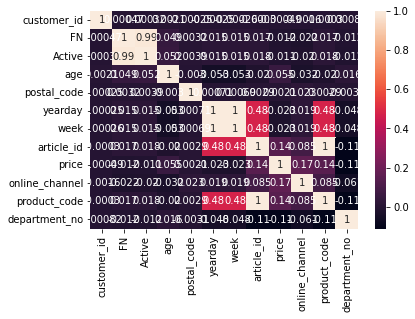

In [16]:
sns.heatmap(df_full.corr(), annot = True, fmt='.2g') # O parâmetro annot = True faz com que os valores fiquem visíveis no mapa.
plt.show()

### Seleção de features

Uma vez que o dataset apresenta uma série de features que podem dificultar o processo de análise sobre qual feature é mais relevante, é possível utilizar uma ferramenta que classifica as features de acordo com seu nível de relevância em relação a uma feature alvo.

Essa classificação pode servir de grande ajuda ao considerar a construção de modelos de Machine Learning para tarefas de classificação, previsão ou agrupamento.


In [ ]:
features = df_full.drop(['price'],1)
label = df_full['price']

features_list = ('customer_id', 'FN', 'Active', 'club_member_status',
                 'fashion_news_frequency', 'age', 'postal_code', 't_dat', 'yearday',
                 'week', 'day_name', 'article_id', 'price', 'online_channel',
                 'product_code', 'prod_name', 'product_group_name', 'department_no',
                 'department_name', 'detail_desc', 'product_type',
                 'graphical_appearance', 'colour_group', 'perceived_colour_value',
                 'perceived_colour_master', 'index', 'index_group', 'garment_group')

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, label)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print ('')
print ("Melhores features:")
print (k_best_features_final)


## 4) Apresentação de Insights em um dashboard do Power BI

Link para dashboard do Power BI: https://app.powerbi.com/view?r=eyJrIjoiNmNlZGFhN2YtNzA5Zi00NmEwLTk4MDAtMThkYWU0YWI5YjE1IiwidCI6ImQ0MmJlNTIzLTg5ZDQtNGUwMi1hNjJiLWE0MzFhZGZmOTMyMSJ9&pageName=ReportSection